In [8]:
import pandas as pd
import seaborn as sns

In [9]:
dataset = "restaurants"

In [10]:
import numpy as np
import matplotlib as mpl

def create_palette(saturation, value, n_colors, int_colors=3):
        hue = np.linspace(0, 1, n_colors, endpoint=False)
        hue = np.hstack([hue[i::int_colors] for i in range(int_colors)])
        saturation = np.full(n_colors, saturation)
        value = np.full(n_colors, value)
        # convert to RGB
        c = mpl.colors.hsv_to_rgb(np.vstack([hue, saturation, value]).T)
        # Create palette
        palette = mpl.colors.ListedColormap(c)
        return palette

palette = sns.color_palette(create_palette(0.9, 0.8, 4, 1)(np.arange(4)))
palette

[(0.8, 0.07999999999999999, 0.07999999999999999),
 (0.44000000000000006, 0.8, 0.07999999999999999),
 (0.07999999999999999, 0.8, 0.8),
 (0.44000000000000006, 0.07999999999999999, 0.8)]

In [11]:
df = pd.read_csv(f'results/{dataset}_x_results_auc.csv', index_col=0)
df.head()

,auc,prauc,model,assignment,k,iteration
0,0.831121,0.029494,BiAA,soft,2,0
1,0.826429,0.024187,SBM,soft,2,0
2,0.835271,0.038601,DBiAA,soft,2,0
3,0.789075,0.038600,DSBM,soft,2,0
4,0.790760,0.014522,BiAA,hard,2,0


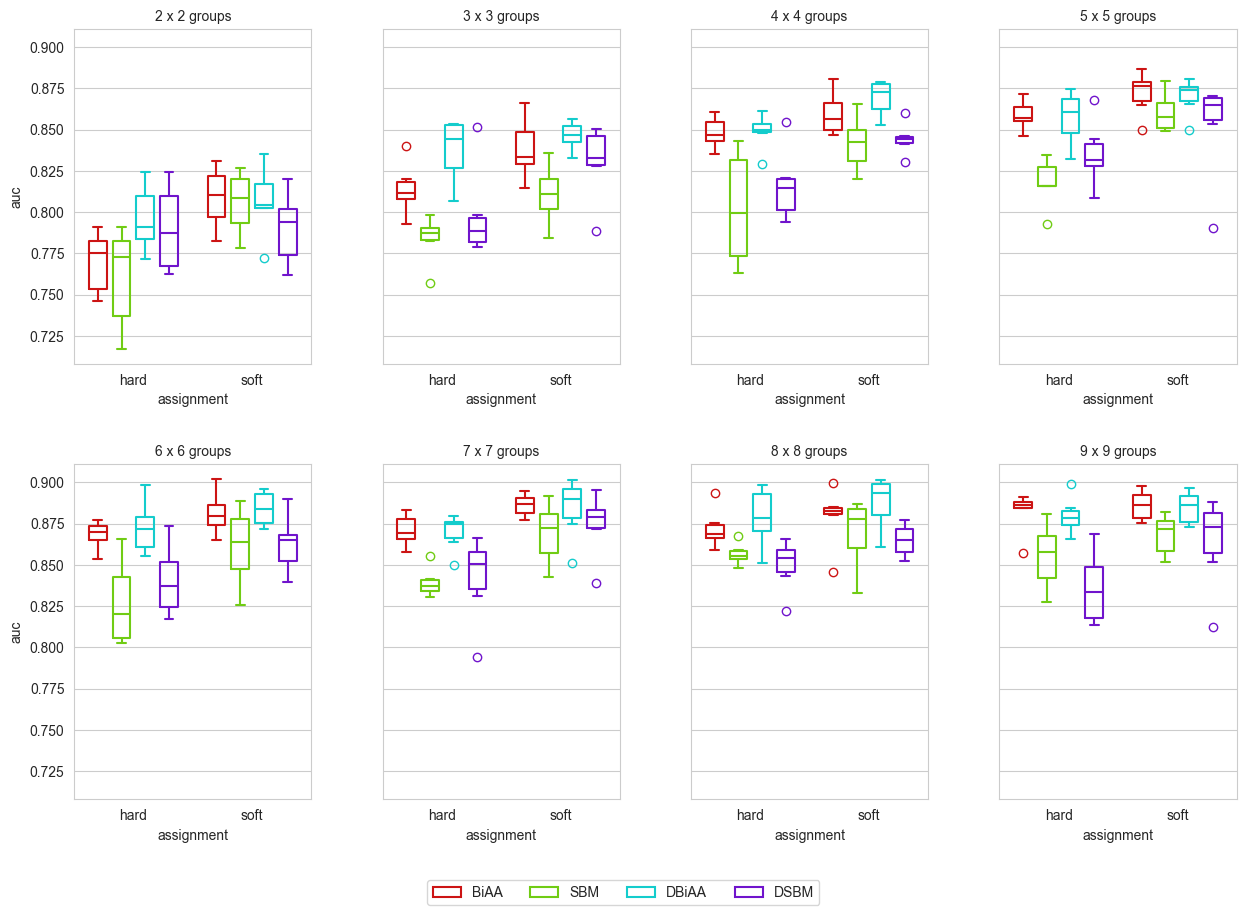

In [12]:
import matplotlib.pyplot as plt
hue_order = ["BiAA", "SBM", "DBiAA", "DSBM"]
x_order = ["hard", "soft"]

fig, axs = plt.subplots(2, 4, figsize=(15, 10), sharex=False, sharey=True)
# leave some space between plots
fig.subplots_adjust(wspace=0.3, hspace=0.3)

for i, ax in enumerate(axs.flatten()):
    k = i + 2
    if k in df.k.unique():
        sns.boxplot(
            data=df[df['k'] == k],
            x='assignment',
            order=x_order,
            y='auc',
            hue='model',
            hue_order=hue_order,
            dodge=True,
            palette=palette,
            ax=ax,
            fill=False,
            gap=.25
        )
        # set label on top of the plot
        ax.set_title(f'{k} x {k} groups', fontsize=10)

        
        # hide legend
        ax.get_legend().remove()
        # set limit on y axis
        # ax.set_ylim(0.8, 1)
# set legend outside the plot
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


# get the legend
handles, labels = axs.flatten()[-1].get_legend_handles_labels()

# plot the legend lower, center of the whole figure
fig.legend(handles, labels, loc='lower center', ncol=4)

# save figure fig
fig.savefig(f'figures/{dataset}_boxplot.pdf', dpi=300)

plt.show()

In [13]:
df = pd.read_csv(f'results/{dataset}_x_results_loss.csv')
df.head()

,Unnamed: 0,loss,step,model,assignment,k,iteration
0,0,3255.051758,0,BiAA,soft,2,0
1,1,3210.897949,20,BiAA,soft,2,0
2,2,3038.341309,40,BiAA,soft,2,0
3,3,2841.587402,60,BiAA,soft,2,0
4,4,2736.352783,80,BiAA,soft,2,0


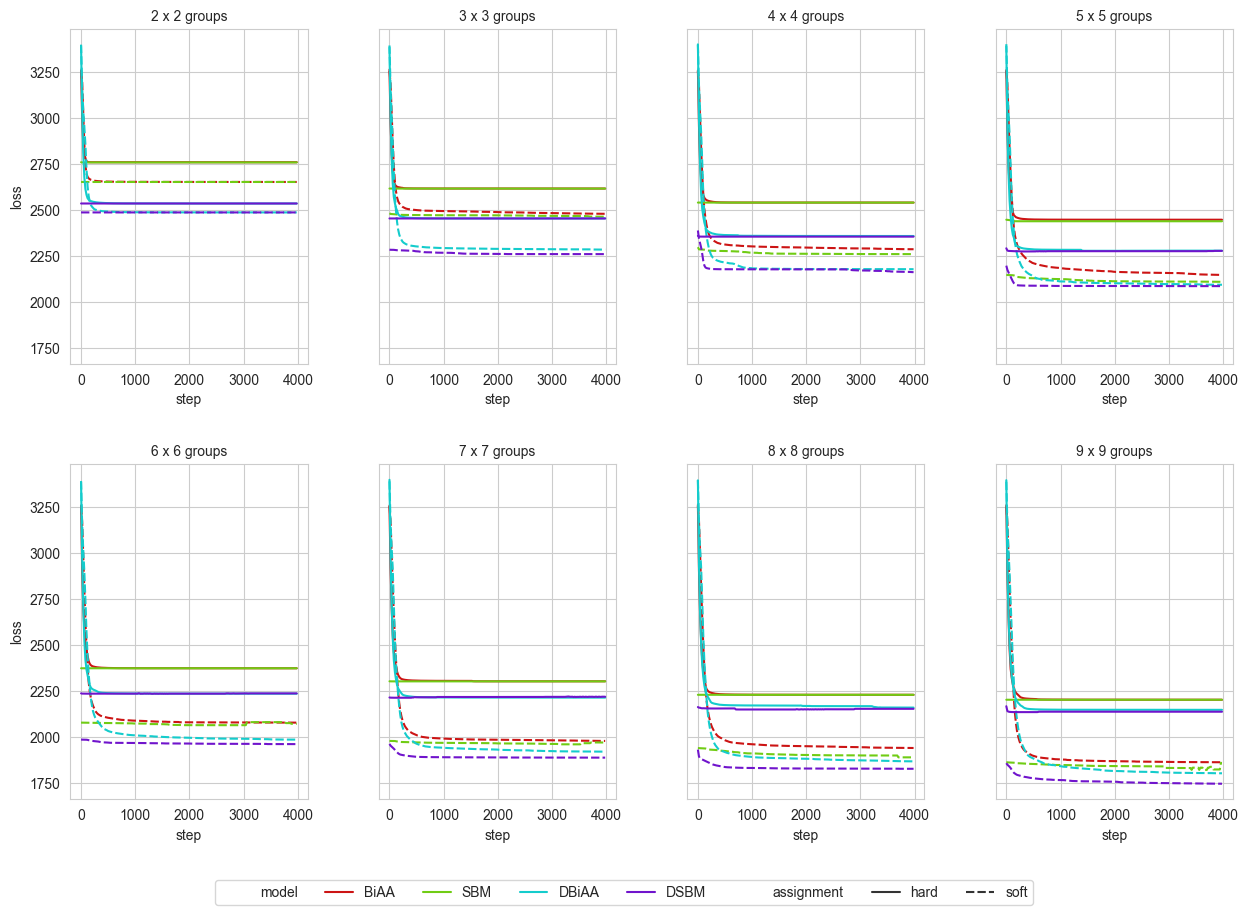

In [14]:
fig, axs = plt.subplots(2, 4, figsize=(15, 10), sharex=False, sharey=True)
# leave some space between plots
fig.subplots_adjust(wspace=0.3, hspace=0.3)

for i, ax in enumerate(axs.flatten()):
    k = i + 2
    
    if k in df.k.unique():
        df_i = df[(df['k'] == k)]
        df_i = df_i.groupby(['model', 'assignment', 'step']).mean().reset_index()
        sns.lineplot(
            data=df_i,
            x='step',
            y='loss',
            hue='model',
            hue_order=hue_order,
            style='assignment',
            palette=palette,
            ax=ax
        )
        
        # set label on top of the plot
        ax.set_title(f'{k} x {k} groups', fontsize=10)
        
        # hide legend
        ax.get_legend().remove()

# get the legend
handles, labels = axs.flatten()[-1].get_legend_handles_labels()

# plot the legend lower, center of the whole figure
fig.legend(handles, labels, loc='lower center', ncol=len(labels))

# save figure fig
fig.savefig(f'figures/{dataset}_loss.pdf', dpi=300)

plt.show()